In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


#  Split feature and target

In [3]:
X = df.iloc[:,1:17].values
y = df["type"]

In [4]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

# Standarization

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

# Train & Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=0)

# Model Creation

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

# Model validation

In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [9]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)

In [10]:
accuracy_score(y_test,y_pred)

1.0

In [11]:
y_pred1 = model.predict(X_train)
accuracy_score(y_train,y_pred1)

0.96

# K-Fold Testing: help us to find out stability of the accuracy

In [12]:
from sklearn.model_selection import KFold,cross_val_score

fold = KFold(n_splits=10)

model1 = KNeighborsClassifier()

In [13]:
results = cross_val_score(model1,X,y,cv=fold) 

In [14]:
results.min(),results.max()

(0.6, 1.0)

In [15]:
results.mean()

0.8800000000000001

# Choose the number of k

In [16]:
est = []

for i in range(1,15):
    model = KNeighborsClassifier(n_neighbors=i)
    est.append(model)

In [17]:
score = []

for i in range(len(est)):
    est[i].fit(X_train,y_train)
    sc = est[i].score(X_test,y_test)
    score.append(sc)

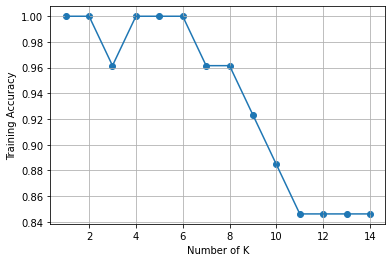

In [18]:
import matplotlib.pyplot as plt
plt.scatter(range(1,15),score)
plt.plot(range(1,15),score)
plt.xlabel("Number of K")
plt.ylabel("Training Accuracy")
plt.grid()

# Final Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6,metric="minkowski",p=2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [22]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

1.0